In [1]:
## import data manipulation packages
import pandas as pd
import numpy as np
from sklearn.neighbors import DistanceMetric
from math import radians

## import dataset "medium size" as variable 'city' and drop NaN
cities = pd.read_excel('data/medium_cities.xlsx')
ct = cities.dropna(axis = 'rows', how = 'any')
## considero solo al di sopra dell'equatore
## ct = ct[ct.lat >= 0]

In [2]:
#add london Start (spostando lievemente la longitudine, così che sia più ad est di London)
London_st = ct.loc[(ct['city'] == 'London') & (ct['iso3'] == 'GBR')]
London_st['city']='London_st' 
London_st['lng'] = London_st['lng'] + 0.2

<ipython-input-2-b81702dafba4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  London_st['city']='London_st'
<ipython-input-2-b81702dafba4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  London_st['lng'] = London_st['lng'] + 0.2


In [3]:
## attacco la riga London_st al dataframe
ct = ct.append(London_st)

In [4]:
## resetto l'index, che sia progressivo
ct = ct.reset_index()
print(ct)

     index                     city               city_ascii      lat  \
0        0                   London                   London  51.5072   
1        8                 Qadsayyā                 Qadsayya  33.5333   
2       11                 Szczecin                 Szczecin  53.4247   
3       24                Stratford                Stratford -39.3410   
4       25             Medzilaborce             Medzilaborce  49.2717   
..     ...                      ...                      ...      ...   
299   1086  San Martín de los Andes  San Martin de los Andes -40.1667   
300   1090            Phanat Nikhom            Phanat Nikhom  13.4458   
301   1094                   Roanne                   Roanne  46.0367   
302   1098                Keszthely                Keszthely  46.7675   
303      0                London_st                   London  51.5072   

          lng         country iso2 iso3            admin_name  capital  \
0     -0.1275  United Kingdom   GB  GBR       Lon

In [5]:
## concatenate iso2 and city to get unique id
ct['ID'] = ct['city'].map(str) + ct['iso2'].map(str)

In [6]:
## drop not usable columns
ct = ct.drop(['city_ascii', 'country', 'iso2', 'admin_name', 'capital', 'id'], axis = 1)

In [7]:
## droppo la colonna index duplicata
ct = ct.drop('index', axis = 1)

In [8]:
# population - dove la popolazione è > di 200,000 abitanti aggiungo peso 2
pop = np.where(ct['population'] < 200000 , 0 , 2 )
#same state  - dove lo stato è diverso aggiungo peso 2
i = ct['iso3'].to_numpy()
st = (i[:, None ] != i) * 2

In [9]:
print(st)

[[0 2 2 ... 2 2 0]
 [2 0 2 ... 2 2 2]
 [2 2 0 ... 2 2 2]
 ...
 [2 2 2 ... 0 2 2]
 [2 2 2 ... 2 0 2]
 [0 2 2 ... 2 2 0]]


In [10]:
# direction - lavoro sulla longitudine e prendo le longitudini ad "est", normalizzando le long negative aggiungendo 150
## forse dobbiamo aggiungere 180? visto che dovrebbe essere su 360 totale?
dr_x = np.where(ct['lng']>= 0 , ct['lng'] , (ct['lng'] + 150) + 150)
x = dr_x
drdf = (x[:, None ] < x)*1

In [11]:
print(drdf)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 1 1 ... 0 1 0]
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 1 1 0]]


In [12]:
# metto i giusti indici alle matrici 
direction = pd.DataFrame(drdf, columns = ct['ID'], index = ct['ID'])
same_state = pd.DataFrame(st, columns = ct['ID'], index = ct['ID'])
population = pd.DataFrame(pop , index = ct['ID'])

In [13]:
print(direction)

ID                         LondonGB  QadsayyāSY  SzczecinPL  StratfordNZ  \
ID                                                                         
LondonGB                          0           0           0            0   
QadsayyāSY                        1           0           0            1   
SzczecinPL                        1           1           0            1   
StratfordNZ                       1           0           0            0   
MedzilaborceSK                    1           1           0            1   
...                             ...         ...         ...          ...   
San Martín de los AndesAR         1           0           0            0   
Phanat NikhomTH                   1           0           0            1   
RoanneFR                          1           1           1            1   
KeszthelyHU                       1           1           0            1   
London_stGB                       1           1           1            1   

ID         

In [14]:
## coversion of coordinated in degrees to radians
ct['lat'] = np.radians(ct['lat'])
ct['lng'] = np.radians(ct['lng'])

In [15]:
## get the scipy metrics
dist = DistanceMetric.get_metric('haversine')

In [16]:
## prepare the array to get in input for the distance calculation
ct[['lat','lng']].to_numpy()

array([[ 8.98970228e-01, -2.22529480e-03],
       [ 5.85266494e-01,  6.32100659e-01],
       [ 9.32436917e-01,  2.54037909e-01],
       [-6.86629981e-01,  3.04182963e+00],
       [ 8.59953393e-01,  3.82300410e-01],
       [ 4.86248730e-01, -1.76487694e+00],
       [ 4.44016998e-01, -1.78336347e+00],
       [ 7.28544063e-01,  4.25846375e-01],
       [ 6.44026494e-01,  1.35554487e-01],
       [ 1.81805712e-01, -1.07250483e+00],
       [ 2.37945973e-01,  2.87687857e-01],
       [ 8.39707574e-01,  8.96907249e-02],
       [ 7.29949053e-01, -1.24649146e+00],
       [ 8.17395285e-01,  5.14580659e-01],
       [ 1.85004901e-01,  1.81805189e+00],
       [ 2.41433141e-01,  3.63634114e-01],
       [ 1.63188285e-01,  7.47000920e-01],
       [ 3.68390136e-01, -1.32883610e+00],
       [ 2.58256369e-01, -1.56283763e+00],
       [-3.92699082e-01, -1.11410126e+00],
       [ 1.10132719e+00,  4.02540993e-01],
       [ 7.93833340e-01,  3.15904595e-01],
       [ 2.60362982e-01, -4.10312945e-01],
       [ 7.

In [17]:
## pass pairwise function to get the distance / multiply for 6373 as earth sperical radius is 6373kms
dist.pairwise(ct [['lat','lng']].to_numpy())*6373

array([[   0.        , 3532.53108603, 1015.62748887, ...,  681.54793619,
        1365.60252073,   13.84624764],
       [3532.53108603,    0.        , 2796.46363452, ..., 3051.2012908 ,
        2172.98302225, 3519.54520478],
       [1015.62748887, 2796.46363452,    0.        , ..., 1112.97667748,
         764.82369326, 1002.45217865],
       ...,
       [ 681.54793619, 3051.2012908 , 1112.97667748, ...,    0.        ,
        1012.81709679,  675.08460056],
       [1365.60252073, 2172.98302225,  764.82369326, ..., 1012.81709679,
           0.        , 1352.29488838],
       [  13.84624764, 3519.54520478, 1002.45217865, ...,  675.08460056,
        1352.29488838,    0.        ]])

In [18]:
## create the distance matrix with cities in the indexes
distance = pd.DataFrame(dist.pairwise(ct[['lat','lng']].to_numpy())*6373, columns = ct['ID'], index = ct['ID'])

In [19]:
## identify 'London' ID arrival (se dovesse servire come indice)
ct.loc[(ct['city'] == 'London') & (ct['iso3'] == 'GBR')]

,city,lat,lng,iso3,population,ID
0,London,0.89897,-0.002225,GBR,10979000.0,LondonGB


In [20]:
## identify 'London_st' ID start (se dovesse servire come indice)
ct.loc[(ct['city'] == 'London_st')]

,city,lat,lng,iso3,population,ID
303,London_st,0.89897,0.001265,GBR,10979000.0,London_stGB


In [21]:
## get starting line from distance matrix
distance.loc[['London_stGB']]

ID,LondonGB,QadsayyāSY,SzczecinPL,StratfordNZ,MedzilaborceSK,SabinasMX,Parras de la FuenteMX,DevinBG,AnnabaDZ,CouvaTT,...,SarnenCH,Hà GiangVN,NangandaoCN,HódmezővásárhelyHU,NavolatoMX,San Martín de los AndesAR,Phanat NikhomTH,RoanneFR,KeszthelyHU,London_stGB
ID,,,,,,,,,,,,,,,,,,,,,
London_stGB,13.846248,3519.545205,1002.452179,18595.803315,1562.028155,8341.386815,8617.009881,2137.517369,1734.387158,7153.913534,...,783.969838,9012.57419,8418.932515,1576.203015,9016.659957,12312.040183,9594.060777,675.084601,1352.294888,0.0


In [22]:
from pandas import DataFrame

In [23]:
#create the graph 
graph = pd.DataFrame(np.zeros(shape=(len(ct),len(ct))) , columns = ct['ID'], index = ct['ID'])

## azzero tutti le combinazioni che non siano verso ovest
for i in distance :
    graph[i] = distance[i]*direction[i]
    
print(graph)

ID                             LondonGB   QadsayyāSY   SzczecinPL  \
ID                                                                  
LondonGB                       0.000000     0.000000     0.000000   
QadsayyāSY                  3532.531086     0.000000     0.000000   
SzczecinPL                  1015.627489  2796.463635     0.000000   
StratfordNZ                18600.596154     0.000000     0.000000   
MedzilaborceSK              1575.873913  2111.200743     0.000000   
...                                 ...          ...          ...   
San Martín de los AndesAR  12301.328866     0.000000     0.000000   
Phanat NikhomTH             9607.297872     0.000000     0.000000   
RoanneFR                     681.547936  3051.201291  1112.976677   
KeszthelyHU                 1365.602521  2172.983022     0.000000   
London_stGB                   13.846248  3519.545205  1002.452179   

ID                          StratfordNZ  MedzilaborceSK     SabinasMX  \
ID                           

In [24]:
## forzo "LondonGB" ad ovest di "London_stGB" - questo andrà risolto
graph.loc['London_stGB']['LondonGB'] = 0
print(graph)

ID                             LondonGB   QadsayyāSY   SzczecinPL  \
ID                                                                  
LondonGB                       0.000000     0.000000     0.000000   
QadsayyāSY                  3532.531086     0.000000     0.000000   
SzczecinPL                  1015.627489  2796.463635     0.000000   
StratfordNZ                18600.596154     0.000000     0.000000   
MedzilaborceSK              1575.873913  2111.200743     0.000000   
...                                 ...          ...          ...   
San Martín de los AndesAR  12301.328866     0.000000     0.000000   
Phanat NikhomTH             9607.297872     0.000000     0.000000   
RoanneFR                     681.547936  3051.201291  1112.976677   
KeszthelyHU                 1365.602521  2172.983022     0.000000   
London_stGB                    0.000000  3519.545205  1002.452179   

ID                          StratfordNZ  MedzilaborceSK     SabinasMX  \
ID                           

In [25]:
## traspongo per lavorare sulle righe
graph = graph.T
print(graph)

ID                         LondonGB    QadsayyāSY    SzczecinPL   StratfordNZ  \
ID                                                                              
LondonGB                        0.0   3532.531086   1015.627489  18600.596154   
QadsayyāSY                      0.0      0.000000   2796.463635      0.000000   
SzczecinPL                      0.0      0.000000      0.000000      0.000000   
StratfordNZ                     0.0  16248.106884  17828.766595      0.000000   
MedzilaborceSK                  0.0      0.000000    687.878762      0.000000   
...                             ...           ...           ...           ...   
San Martín de los AndesAR       0.0  13711.201274  13241.231609   8953.849183   
Phanat NikhomTH                 0.0   6881.671334   8591.754993      0.000000   
RoanneFR                        0.0      0.000000      0.000000      0.000000   
KeszthelyHU                     0.0      0.000000    764.823693      0.000000   
London_stGB                 

In [26]:
dis = graph.replace(0, 0)
dis

ID,LondonGB,QadsayyāSY,SzczecinPL,StratfordNZ,MedzilaborceSK,SabinasMX,Parras de la FuenteMX,DevinBG,AnnabaDZ,CouvaTT,...,SarnenCH,Hà GiangVN,NangandaoCN,HódmezővásárhelyHU,NavolatoMX,San Martín de los AndesAR,Phanat NikhomTH,RoanneFR,KeszthelyHU,London_stGB
ID,,,,,,,,,,,,,,,,,,,,,
LondonGB,0.0,3532.531086,1015.627489,18600.596154,1575.873913,8328.946686,8604.485457,2150.459488,1739.964805,7140.636852,...,794.989530,9025.051667,8429.591631,1589.700410,9004.531603,12301.328866,9607.297872,681.547936,1365.602521,0.000000
QadsayyāSY,0.0,0.000000,2796.463635,0.000000,2111.200743,0.000000,0.000000,1382.258306,2602.494704,0.000000,...,2779.469921,0.000000,0.000000,1965.895681,0.000000,0.000000,0.000000,3051.201291,2172.983022,3519.545205
SzczecinPL,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1911.470935,0.000000,...,853.223078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1112.976677,0.000000,1002.452179
StratfordNZ,0.0,16248.106884,17828.766595,0.000000,17579.891466,0.000000,0.000000,17474.928199,18811.975106,0.000000,...,18613.614684,9972.017153,10358.388895,17770.324696,0.000000,0.000000,9556.147086,18929.870160,17990.138542,18595.803315
MedzilaborceSK,0.0,0.000000,687.878762,0.000000,0.000000,0.000000,0.000000,0.000000,1786.294799,0.000000,...,1047.005989,0.000000,0.000000,337.453298,0.000000,0.000000,0.000000,1380.256828,444.467240,1562.028155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Martín de los AndesAR,0.0,13711.201274,13241.231609,8953.849183,13474.171760,8168.761492,7965.156469,13249.091792,11765.589527,0.000000,...,12471.804316,18061.681995,19310.879750,13220.807974,8144.550858,0.000000,16961.118781,12158.816541,13036.308524,12312.040183
Phanat NikhomTH,0.0,6881.671334,8591.754993,0.000000,8107.269985,0.000000,0.000000,7930.055793,9415.559394,0.000000,...,9143.095700,0.000000,0.000000,8235.947917,0.000000,0.000000,0.000000,9476.416246,8467.633042,9594.060777
RoanneFR,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,675.084601


In [27]:
## popolare per criteri (più vicino +2, secondo più vicino +4, terzo più vicino +8, il resto 'no go')
dis = graph.replace(0, 0)

In [28]:
dis = dis.replace(dis.apply(lambda x: x[x > 0].min(axis=0)), 2)
dis = dis.replace(dis.apply(lambda x: x[x > 2].min(axis=0)), 4)
dis = dis.replace(dis.apply(lambda x: x[x > 4].min(axis=0)), 8)

dis
#dis = dis.replace(dis.apply(lambda x: x[x > 8]), 'no go')

ID,LondonGB,QadsayyāSY,SzczecinPL,StratfordNZ,MedzilaborceSK,SabinasMX,Parras de la FuenteMX,DevinBG,AnnabaDZ,CouvaTT,...,SarnenCH,Hà GiangVN,NangandaoCN,HódmezővásárhelyHU,NavolatoMX,San Martín de los AndesAR,Phanat NikhomTH,RoanneFR,KeszthelyHU,London_stGB
ID,,,,,,,,,,,,,,,,,,,,,
LondonGB,0.0,3532.531086,1015.627489,18600.596154,1575.873913,8328.946686,8604.485457,2150.459488,1739.964805,7140.636852,...,794.989530,9025.051667,8429.591631,1589.700410,9004.531603,12301.328866,9607.297872,681.547936,1365.602521,0.000000
QadsayyāSY,0.0,0.000000,2796.463635,0.000000,2111.200743,0.000000,0.000000,1382.258306,2602.494704,0.000000,...,2779.469921,0.000000,0.000000,1965.895681,0.000000,0.000000,0.000000,3051.201291,2172.983022,3519.545205
SzczecinPL,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1911.470935,0.000000,...,853.223078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1112.976677,0.000000,1002.452179
StratfordNZ,0.0,16248.106884,17828.766595,0.000000,17579.891466,0.000000,0.000000,17474.928199,18811.975106,0.000000,...,18613.614684,9972.017153,10358.388895,17770.324696,0.000000,0.000000,9556.147086,18929.870160,17990.138542,18595.803315
MedzilaborceSK,0.0,0.000000,687.878762,0.000000,0.000000,0.000000,0.000000,0.000000,1786.294799,0.000000,...,1047.005989,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,1380.256828,444.467240,1562.028155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Martín de los AndesAR,0.0,13711.201274,13241.231609,8.000000,13474.171760,8168.761492,7965.156469,13249.091792,11765.589527,0.000000,...,12471.804316,18061.681995,19310.879750,13220.807974,8144.550858,0.000000,16961.118781,12158.816541,13036.308524,12312.040183
Phanat NikhomTH,0.0,6881.671334,8591.754993,0.000000,8107.269985,0.000000,0.000000,7930.055793,9415.559394,0.000000,...,9143.095700,0.000000,0.000000,8235.947917,0.000000,0.000000,0.000000,9476.416246,8467.633042,9594.060777
RoanneFR,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,675.084601


In [29]:
#parte messa solo perchè l'utima riga sopra non mi va 
dis = dis.where((dis <= 8), 0) 
dis

ID,LondonGB,QadsayyāSY,SzczecinPL,StratfordNZ,MedzilaborceSK,SabinasMX,Parras de la FuenteMX,DevinBG,AnnabaDZ,CouvaTT,...,SarnenCH,Hà GiangVN,NangandaoCN,HódmezővásárhelyHU,NavolatoMX,San Martín de los AndesAR,Phanat NikhomTH,RoanneFR,KeszthelyHU,London_stGB
ID,,,,,,,,,,,,,,,,,,,,,
LondonGB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
QadsayyāSY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SzczecinPL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
StratfordNZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MedzilaborceSK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Martín de los AndesAR,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Phanat NikhomTH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RoanneFR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
print(dis)

ID                         LondonGB  QadsayyāSY  SzczecinPL  StratfordNZ  \
ID                                                                         
LondonGB                        0.0         0.0         0.0          0.0   
QadsayyāSY                      0.0         0.0         0.0          0.0   
SzczecinPL                      0.0         0.0         0.0          0.0   
StratfordNZ                     0.0         0.0         0.0          0.0   
MedzilaborceSK                  0.0         0.0         0.0          0.0   
...                             ...         ...         ...          ...   
San Martín de los AndesAR       0.0         0.0         0.0          8.0   
Phanat NikhomTH                 0.0         0.0         0.0          0.0   
RoanneFR                        0.0         0.0         0.0          0.0   
KeszthelyHU                     0.0         0.0         0.0          0.0   
London_stGB                     0.0         0.0         0.0          0.0   

ID         

In [31]:
for i in dis :
    graph[i] = (dis[i] + same_state[i] + pop) * dis[i] / dis[i]
    
graph

ID,LondonGB,QadsayyāSY,SzczecinPL,StratfordNZ,MedzilaborceSK,SabinasMX,Parras de la FuenteMX,DevinBG,AnnabaDZ,CouvaTT,...,SarnenCH,Hà GiangVN,NangandaoCN,HódmezővásárhelyHU,NavolatoMX,San Martín de los AndesAR,Phanat NikhomTH,RoanneFR,KeszthelyHU,London_stGB
ID,,,,,,,,,,,,,,,,,,,,,
LondonGB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QadsayyāSY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SzczecinPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StratfordNZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MedzilaborceSK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Martín de los AndesAR,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Phanat NikhomTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RoanneFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
print(graph)

ID                         LondonGB  QadsayyāSY  SzczecinPL  StratfordNZ  \
ID                                                                         
LondonGB                        NaN         NaN         NaN          NaN   
QadsayyāSY                      NaN         NaN         NaN          NaN   
SzczecinPL                      NaN         NaN         NaN          NaN   
StratfordNZ                     NaN         NaN         NaN          NaN   
MedzilaborceSK                  NaN         NaN         NaN          NaN   
...                             ...         ...         ...          ...   
San Martín de los AndesAR       NaN         NaN         NaN         10.0   
Phanat NikhomTH                 NaN         NaN         NaN          NaN   
RoanneFR                        NaN         NaN         NaN          NaN   
KeszthelyHU                     NaN         NaN         NaN          NaN   
London_stGB                     NaN         NaN         NaN          NaN   

ID         

In [33]:
# parte messa solo perchè l'utima riga sopra non mi va 
graph = graph.where((graph > 1), 0) 
graph = graph.T # dataframe (la trasposta è per mettere i pesi sulle righe o sulle colonne)

In [34]:
## un tentativo con networkX (mi prende il peso minore però----)

import networkx as nx

In [35]:
## creo grafo con networkX direzionato da graph cheè matrice di adiacenza non simmetrica
D = nx.from_pandas_adjacency(graph, create_using = nx.DiGraph)

In [36]:
## visualizzo i nodi
D.nodes()

NodeView(('LondonGB', 'QadsayyāSY', 'SzczecinPL', 'StratfordNZ', 'MedzilaborceSK', 'SabinasMX', 'Parras de la FuenteMX', 'DevinBG', 'AnnabaDZ', 'CouvaTT', 'MoussoroTD', 'ChaumontFR', 'ProvidenceUS', 'BenderMD', 'KampotKH', 'AbéchéTD', 'JijigaET', 'GibaraCU', 'ChiquimulaGT', 'TartagalAR', 'KauhavaFI', 'NašiceHR', 'PraiaCV', 'KhŭjandTJ', 'KurikkaFI', 'CunduacánMX', 'KłodzkoPL', 'ZariaNG', 'KriževciHR', 'CanberraAU', 'TakābIR', 'HanauDE', 'IndianapolisUS', 'PortimãoPT', 'NawáSY', 'Biên HòaVN', 'SopronHU', 'BalkhAF', 'DongningCN', 'CarlowIE', 'TindoufDZ', 'LeerDE', 'TrogirHR', 'OberhausenDE', 'AbasoloMX', 'SalskRU', 'LeobenAT', 'OstravaCZ', 'AbakanRU', 'CoutancesFR', 'PaideEE', 'BijeljinaBA', 'PeshteraBG', 'ŌtsuJP', 'SanmingCN', 'WuhaiCN', 'PolokwaneZA', 'AmbatondrazakaMG', 'Urgut ShahriUZ', 'CloppenburgDE', '‘IbrīOM', 'DarmstadtDE', 'KoutialaML', 'OdemiraPT', 'MusomaTZ', 'ZapopanMX', 'KissidougouGN', 'Ciudad Guadalupe VictoriaMX', 'AstravyetsBY', 'JilotepecMX', 'Santa AnaMX', 'Mo i RanaNO

In [37]:
## link all'algoritmo usato
## https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.single_source_dijkstra.html#networkx.algorithms.shortest_paths.weighted.single_source_dijkstra
length, path = nx.single_source_dijkstra(D, source = 'London_stGB', target = 'LondonGB')
print(length)
print(path)

12.0
['London_stGB', 'CoutancesFR', 'LondonGB']


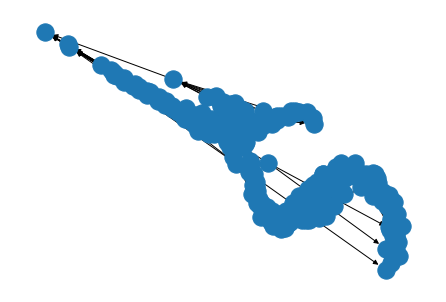

In [38]:
## visualizzo D grafo direzionato
nx.draw(D)

In [39]:
## se vogliamo altri formati
## gr_array = np.array(graph) ## array


In [40]:
## list
## gr_ls = gr_array.tolist()
## print(gr_ls)

In [41]:
## type(gr_ls)

NameError: name 'gr_ls' is not defined

In [ ]:
# GR = nx.from_numpy_array(gr_array)
# GR.edges(data=True)

In [ ]:
## GR.nodes()

In [ ]:
## nx.shortest_path(GR, source = 0, target = 271)